## Data Collection

extract data from flatfiles, web, database, etc.

### CSV

In [1]:
import csv
import pandas as pd
from pprint import pprint

In [2]:
def print_tabular_data(filename,delimiter=","):
    """This function extracts and prints tabular csv content from given filename
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma ('\t')

    Returns:
        None

    """
    df = pd.read_csv(filename,sep=delimiter)
    print(df)

In [3]:
print_tabular_data('datasets/data_collection/tabular_csv.csv')

   sno      fruit   color   price
0    1      apple     red  110.85
1    2     banana  yellow   50.12
2    3      mango  yellow   70.29
3    4     orange  orange   80.00
4    5       kiwi   green  150.00
5    6  pineapple  yellow   90.00
6    7      guava   green   20.00


### JSON file

In [4]:
import json
import pandas as pd

In [5]:
def print_nested_dicts(nested_dict,indent_level=0):
    """This function prints a nested dict object
    Args:
        nested_dict (dict): the dictionary to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    
    for key, val in nested_dict.items():
        if isinstance(val, dict):
          print("{0} : ".format(key))
          print_nested_dicts(val,indent_level=indent_level+1)
        elif isinstance(val,list):
            print("{0} : ".format(key))
            for rec in val:
                print_nested_dicts(rec,indent_level=indent_level+1)
        else:
          print("{0}{1} : {2}".format("\t"*indent_level,key, val))

def extract_json(file_name,do_print=True):
    """This function extracts and prints json content from a given file
    Args:
        file_name (str): file path to be read
        do_print (bool): boolean flag to print file contents or not

    Returns:
        None

    """
    try:
        json_filedata = open(file_name).read() 
        json_data = json.loads(json_filedata)
        
        if do_print:
            print_nested_dicts(json_data)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("JSON file has errors")
    except Exception:
        raise

def extract_pandas_json(file_name,orientation="records",do_print=True):
    """This function extracts and prints json content from a file using pandas
       This is useful when json data represents tabular, series information
    Args:
        file_name (str): file path to be read
        orientation (str): orientation of json file. Defaults to records
        do_print (bool): boolean flag to print file contents or not

    Returns:
        None

    """
    try:
        df = pd.read_json(file_name,orient=orientation)
        
        if do_print:
            print(df)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("JSON file has errors")
    except Exception:
        raise

In [6]:
extract_pandas_json(r'datasets/data_collection/sample_json.json')

### XML file

In [7]:
import xml.etree.ElementTree as ET
import xmltodict

In [8]:
def print_nested_dicts(nested_dict,indent_level=0):
    """This function prints a nested dict object
    Args:
        nested_dict (dict): the dictionary to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    
    for key, val in nested_dict.items():
        if isinstance(val, dict):
          print("{0} : ".format(key))
          print_nested_dicts(val,indent_level=indent_level+1)
        elif isinstance(val,list):
            print("{0} : ".format(key))
            for rec in val:
                print_nested_dicts(rec,indent_level=indent_level+1)
        else:
          print("{0}{1} : {2}".format("\t"*indent_level,key, val))
          
def print_xml_tree(xml_root,indent_level=0):
    """This function prints a nested dict object
    Args:
        xml_root (dict): the xml tree to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    for child in xml_root:
            print("{0}tag:{1}, attribute:{2}".format(
                                                "\t"*indent_level,
                                                child.tag,
                                                child.attrib))
                                                
            print("{0}tag data:{1}".format("\t"*indent_level,
                                            child.text))
                                            
            print_xml_tree(child,indent_level=indent_level+1)
            


def read_xml(file_name):
    """This function extracts and prints XML content from a given file
    Args:
        file_name (str): file path to be read
    Returns:
        None

    """
    try:
        tree = ET.parse(file_name)
        root = tree.getroot()
        
        print("Root tag:{0}".format(root.tag))
        print("Attributes of Root:: {0}".format(root.attrib))
        
        print_xml_tree(root)
            
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except Exception:
        raise

    

def read_xml2dict_xml(file_name):
    """This function extracts and prints xml content from a file using xml2dict
    Args:
        file_name (str): file path to be read
    Returns:
        None

    """
    try:
        xml_filedata = open(file_name).read() 
        ordered_dict = xmltodict.parse(xml_filedata)
        
        print_nested_dicts(ordered_dict)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("XML file has errors")
    except Exception:
        raise

In [9]:
read_xml2dict_xml(r'datasets/data_collection/sample_xml.xml')

records : 
	@attr : sample xml records
record : 
		@name : rec_1
sub_element : 
			detail1 : Attribute 1
			detail2 : 2
sub_element_with_attr : 
			@attr : complex
			#text : Sub_Element_Text
sub_element_only_attr : 
			@attr_val : only_attr
		@name : rec_2
sub_element : 
			detail1 : Attribute 1
			detail2 : 2
sub_element_with_attr : 
			@attr : complex
			#text : Sub_Element_Text
sub_element_only_attr : 
			@attr_val : only_attr
		@name : rec_3
sub_element : 
			detail1 : Attribute 1
			detail2 : 2
sub_element_with_attr : 
			@attr : complex
			#text : Sub_Element_Text
sub_element_only_attr : 
			@attr_val : only_attr


### Crawling Web Pages using Beautiful Soup

In [10]:
import requests
from time import sleep
from bs4 import BeautifulSoup

## Data Wrangling

### Create sample dataset

In [11]:
import datetime
import numpy as np
import pandas as pd
import random

def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=random.randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10))+ product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    

def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

In [12]:
df_sample = generate_sample_data(row_count=1000)

In [13]:
describe_dataframe(df_sample)




******************************
About the Data
******************************
('Number of rows::', 1000)
('Number of columns::', 7)


('Column Names::', ['Date', 'Price', 'Product ID', 'Quantity Purchased', 'Serial No', 'User ID', 'User Type'])


('Column Data Types::\n', Date                   object
Price                 float64
Product ID              int64
Quantity Purchased      int64
Serial No               int64
User ID                 int64
User Type              object
dtype: object)


('Columns with Missing Values::', ['Date', 'Price'])


('Number of rows with Missing Values::', 61)


('Sample Indices with missing data::', [0, 1, 2, 4, 7])


General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Date                  969 non-null object
Price                 969 non-null float64
Product ID            1000 non-null int64
Quantity Purchased    1000 non-null int64
Serial No             1000 non-null int64
User I

,Date,Price,Product ID,Quantity Purchased,Serial No,User ID,User Type
0,NaN,3439.10,0,33,1000,-101,n
1,NaN,2130.97,452,40,1001,5794,n
2,NaN,4801.83,564,18,1002,5533,n
3,2016-01-28,2401.31,409,1,1003,5027,n
4,NaN,87.96,490,6,1004,5014,n


### Rename Columns

In [14]:
print("Dataframe columns:\n{}".format(df_sample.columns.tolist()))

Dataframe columns:
['Date', 'Price', 'Product ID', 'Quantity Purchased', 'Serial No', 'User ID', 'User Type']


In [15]:
cleanup_column_names(df_sample)

In [16]:
print("Dataframe columns:\n{}".format(df_sample.columns.tolist()))

Dataframe columns:
['date', 'price', 'product_id', 'quantity_purchased', 'serial_no', 'user_id', 'user_type']


### Sort Rows on defined attributes

In [17]:
display(df_sample.sort_values(['serial_no', 'price'], ascending=[True, False]).head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
673,2016-01-21,7033.11,1094,7,-1,5690,c
551,2016-01-02,5223.40,549,11,-1,5393,b
267,2016-05-02,4483.87,1062,11,-1,5216,c
44,2016-01-13,4193.36,442,37,-1,5420,d
295,2016-08-01,3503.71,908,39,-1,5238,a


### Rearrange Columns in a Dataframe

In [18]:
display(df_sample[['serial_no', 'date', 'user_id', 'user_type', 'product_id', 'quantity_purchased', 'price']].head())

,serial_no,date,user_id,user_type,product_id,quantity_purchased,price
0,1000,NaN,-101,n,0,33,3439.10
1,1001,NaN,5794,n,452,40,2130.97
2,1002,NaN,5533,n,564,18,4801.83
3,1003,2016-01-28,5027,n,409,1,2401.31
4,1004,NaN,5014,n,490,6,87.96


### Filter Columns

In [19]:
df_sample.head()

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
0,NaN,3439.10,0,33,1000,-101,n
1,NaN,2130.97,452,40,1001,5794,n
2,NaN,4801.83,564,18,1002,5533,n
3,2016-01-28,2401.31,409,1,1003,5027,n
4,NaN,87.96,490,6,1004,5014,n


Using column index

In [20]:
# print 10 values from column 3 (base 0)
print(df_sample.iloc[:, 3].values[0:10])

[33 40 18  1  6  2  5 37 17  3]


Using column name

In [21]:
# print 10 values with column name "quantity_purchased"
print(df_sample.quantity_purchased.values[0:10])

[33 40 18  1  6  2  5 37 17  3]


Using column data type

In [22]:
# print 10 values of columns with data type float
print(df_sample.select_dtypes(include=['float64']).values[:10, 0])

[ 3439.1   2130.97  4801.83  2401.31    87.96  1932.25  3794.54      nan
   268.57  1119.76]


### Filter Rows

Select specific rows (row index)

In [23]:
display(df_sample.iloc[[10, 501, 20]])

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
10,2016-01-24,883.77,749,33,1010,5570,n
501,2016-01-27,1630.28,452,36,1501,5794,b
20,2016-01-23,11.91,778,12,1020,5046,n


Exclude specific row indices

In [24]:
display(df_sample.drop([0, 24, 51], axis=0).head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
1,NaN,2130.97,452,40,1001,5794,n
2,NaN,4801.83,564,18,1002,5533,n
3,2016-01-28,2401.31,409,1,1003,5027,n
4,NaN,87.96,490,6,1004,5014,n
5,2016-05-01,1932.25,148,2,1005,5766,n


Conditional Filtering

In [25]:
display(df_sample[df_sample.quantity_purchased>25].head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
0,NaN,3439.10,0,33,1000,-101,n
1,NaN,2130.97,452,40,1001,5794,n
7,NaN,NaN,789,37,1007,5047,n
10,2016-01-24,883.77,749,33,1010,5570,n
11,2016-01-27,218.00,560,40,1011,5359,n


### Data type conversion

In [26]:
df_sample['date'] = pd.to_datetime(df_sample.date)
print(df_sample.dtypes)

date                  datetime64[ns]
price                        float64
product_id                     int64
quantity_purchased             int64
serial_no                      int64
user_id                        int64
user_type                     object
dtype: object


### Apply/Map usage

- **Map**: map 仅面向 Series 类型数据
- **Apply**: apply 既可以操作 DataFrame数据，也可以操作Series数据
- **Applymap**: applymap 部分行、列，对所有元素进行操作。操作对象可以是DataFrame 或者 Series

In [28]:
def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

In [29]:
df_sample['user_class'] = df_sample['user_type'].map(expand_user_type)
display(df_sample.tail())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class
995,2016-12-01,2137.13,908,7,1995,5238,a,new
996,2016-01-29,1153.66,523,10,1996,5774,a,new
997,2016-01-24,3515.44,859,17,1997,5556,a,new
998,2016-01-31,4119.28,564,40,1998,5885,c,existing
999,2016-01-18,2500.44,936,1,1999,5330,d,loyal_existing


In [30]:
display(df_sample.select_dtypes(include=[np.number]).apply(lambda x: x.max()-x.min()))

price                 11367.67
product_id             1094.00
quantity_purchased       40.00
serial_no              2000.00
user_id                6086.00
dtype: float64

In [31]:
df_sample['purchase_week'] = df_sample[['date']].applymap(lambda dt: dt.week if not pd.isnull(dt.week) else 0)

In [33]:
display(df_sample.head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week
0,NaT,3439.10,0,33,1000,-101,n,error,0
1,NaT,2130.97,452,40,1001,5794,n,error,0
2,NaT,4801.83,564,18,1002,5533,n,error,0
3,2016-01-28,2401.31,409,1,1003,5027,n,error,4
4,NaT,87.96,490,6,1004,5014,n,error,0


### Missing values

1. Drop rows with missing values

In [34]:
df_sample_dropped = df_sample.dropna(subset=['date'])
display(df_sample_dropped.head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week
3,2016-01-28,2401.31,409,1,1003,5027,n,error,4
5,2016-05-01,1932.25,148,2,1005,5766,n,error,17
6,2016-01-24,3794.54,833,5,1006,5656,n,error,3
8,2016-04-01,268.57,116,17,1008,5985,n,error,13
10,2016-01-24,883.77,749,33,1010,5570,n,error,3


2. Fill missing price values with mean price

In [36]:
df_sample_dropped['price'].fillna(value=np.round(df_sample_dropped.price.mean(), decimals=2), inplace=True)

Fill Missing user_type values with value from previous row

In [37]:
df_sample_dropped['user_type'].fillna(method='ffill', inplace=True)

Fill Missing user_type values with value from next row

In [38]:
df_sample_dropped['user_type'].fillna(method='bfill', inplace=True)

### Duplicates

drop duplicate serial_no rows

In [39]:
# sample duplicate rows
display(df_sample_dropped[df_sample_dropped.duplicated(subset=['serial_no'])].head())
print("Shape of df_sample_dropped={}".format(df_sample_dropped.shape))

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week
44,2016-01-13,4193.36,442,37,-1,5420,d,loyal_existing,2
61,2016-01-16,2290.33,777,37,-1,5674,c,existing,2
134,2016-01-25,1814.07,990,24,-1,5326,a,new,4
148,2016-05-01,2545.83,292,29,-1,5644,c,existing,17
205,2016-01-14,2960.78,148,22,-1,5766,a,new,2


Shape of df_sample=(969, 9)


In [41]:
df_sample_dropped.drop_duplicates(subset=['serial_no'], inplace=True)
display(df_sample_dropped.head())
print("Shape of df_sample_dropped={}".format(df_sample_dropped.shape))

/Users/lvshuo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week
3,2016-01-28,2401.31,409,1,1003,5027,n,error,4
5,2016-05-01,1932.25,148,2,1005,5766,n,error,17
6,2016-01-24,3794.54,833,5,1006,5656,n,error,3
8,2016-04-01,268.57,116,17,1008,5985,n,error,13
10,2016-01-24,883.77,749,33,1010,5570,n,error,3


Shape of df_sample_dropped=(941, 9)


### Encode Categorical data

One hot encoding using get_dummies()

In [42]:
display(pd.get_dummies(df_sample, columns=['user_type']).head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_class,purchase_week,user_type_a,user_type_b,user_type_c,user_type_d,user_type_n
0,NaT,3439.10,0,33,1000,-101,error,0,0,0,0,0,1
1,NaT,2130.97,452,40,1001,5794,error,0,0,0,0,0,1
2,NaT,4801.83,564,18,1002,5533,error,0,0,0,0,0,1
3,2016-01-28,2401.31,409,1,1003,5027,error,4,0,0,0,0,1
4,NaT,87.96,490,6,1004,5014,error,0,0,0,0,0,1


Label mapping

In [45]:
type_map = {'a': 0, 'b': 1, 'c': 2, 'd': 3, np.NAN: -1}
df_sample['encoded_user_type'] = df_sample.user_type.map(type_map)
display(df_sample.tail())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
995,2016-12-01,2137.13,908,7,1995,5238,a,new,48,0.0
996,2016-01-29,1153.66,523,10,1996,5774,a,new,4,0.0
997,2016-01-24,3515.44,859,17,1997,5556,a,new,3,0.0
998,2016-01-31,4119.28,564,40,1998,5885,c,existing,4,2.0
999,2016-01-18,2500.44,936,1,1999,5330,d,loyal_existing,3,3.0


### Random Sampling data from DataFrame

In [46]:
display(df_sample.sample(frac=0.2, replace=True, random_state=42).head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
102,2016-03-02,85.81,564,39,1102,5533,a,new,9,0.0
435,2016-01-18,4788.13,259,5,1435,5399,a,new,3,0.0
860,2016-01-13,2405.71,340,34,1860,5895,d,loyal_existing,2,3.0
270,2016-09-01,4447.49,785,21,1270,5444,b,new,35,1.0
106,2016-01-26,3007.24,833,2,1106,5656,a,new,4,0.0


### Normalize Numeric Values

Normalize price values using **Min-Max Scaler**

In [47]:
from sklearn.preprocessing import MinMaxScaler

df_sample_normalized = df_sample.dropna().copy()
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_sample_normalized['price'].values.reshape(-1, 1))
df_sample_normalized['price'] = np_scaled.reshape(-1, 1)

In [48]:
display(df_sample_normalized.head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
28,2016-04-01,0.335491,484,23,1028,5267,a,new,13,0.0
30,2016-01-28,0.322908,1032,37,1030,5417,c,existing,4,2.0
32,2016-05-02,0.172671,653,34,1032,5411,c,existing,18,2.0
33,2016-12-01,0.215582,439,16,1033,5919,c,existing,48,2.0
36,2016-10-01,0.010703,902,35,1036,5750,a,new,39,0.0


### Data Summarization/Aggregation

In [49]:
print("Mean price of items purchased by user_type=a :: {}".format(df_sample['price'][df_sample['user_type'] == 'a'].mean()))

Mean price of items purchased by user_type=a :: 2248.5241784


In [50]:
print(df_sample['purchase_week'].value_counts())

4     165
3     163
2      95
31     55
44     51
22     49
53     48
39     48
13     44
9      41
5      41
26     40
17     40
35     32
0      31
48     31
18     26
Name: purchase_week, dtype: int64


### Group by

In [52]:
print(df_sample.groupby(['user_class'])['quantity_purchased'].sum())

user_class
error              638
existing          5865
loyal_existing    4887
new               9933
Name: quantity_purchased, dtype: int64


Group By with different aggregate functions

In [54]:
display(df_sample.groupby(['user_class'])['quantity_purchased'].agg([np.sum, np.mean, np.count_nonzero]))

,sum,mean,count_nonzero
user_class,,,
error,638,21.266667,30
existing,5865,21.562500,272
loyal_existing,4887,21.914798,223
new,9933,20.911579,475


Group By multi aggregate functions for each attribute

In [55]:
display(df_sample.groupby(['user_class','user_type']).agg({'price':{
                                                                'total_price':np.sum,
                                                                'mean_price':np.mean,
                                                                'variance_price':np.std,
                                                                'count':np.count_nonzero},
                                                   'quantity_purchased':np.sum}))

/Users/lvshuo/anaconda2/lib/python2.7/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price                                          \
                          count total_price   mean_price variance_price   
user_class     user_type                                                  
error          n           30.0    58938.35  2032.356897    1487.942908   
existing       c          272.0   628813.69  2363.961241    1552.172359   
loyal_existing d          223.0   496378.32  2276.964771    1578.259334   
new            a          220.0   478935.65  2248.524178    1511.456455   
               b          255.0   556266.08  2289.160823    1493.478531   

                         quantity_purchased  
                                        sum  
user_class     user_type                     
error          n                        638  
existing       c                       5865  
loyal_existing d                       4887  
new            a                       4566  
               b                       5367

### Pivot Tables

In [57]:
display(df_sample.pivot_table(index='date', columns='user_type', values='price',aggfunc=np.mean))

user_type,a,b,c,d,n
date,,,,,
2016-01-01,1237.640000,2332.696000,2614.085714,2335.071667,NaN
2016-01-02,2420.668000,2209.536667,2027.533333,2066.971429,NaN
2016-01-13,1967.092500,2531.165000,1944.137143,2867.128333,NaN
2016-01-14,2399.320000,826.075000,954.556667,3784.861667,NaN
2016-01-15,1437.680000,2897.745000,1511.680000,2324.873333,NaN
2016-01-16,2160.328571,1706.482500,2970.130000,3620.595000,NaN
2016-01-17,1273.554000,2461.507500,2676.146667,2284.763333,NaN
2016-01-18,3658.301667,2035.830000,2759.793750,2445.270000,NaN
2016-01-19,2455.435000,3083.715000,1661.080000,2442.683750,NaN


## Visualize data

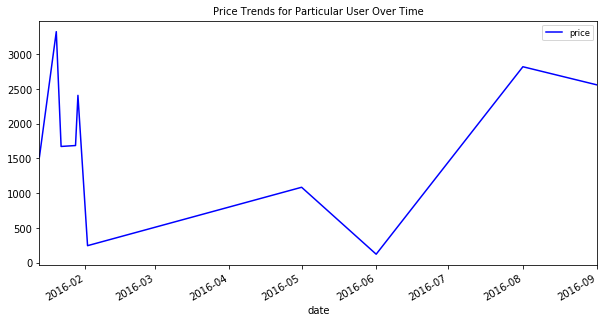

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import datetime 
import numpy as np
import pandas as pd

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

max_user_id = df_sample.user_id.value_counts().index[0]
df_sample[df_sample.user_id == max_user_id].plot(x='date',y='price',style='blue')   
plt.title('Price Trends for Particular User Over Time')
plt.show()

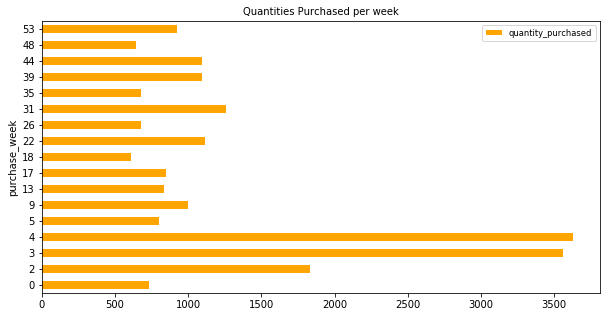

In [61]:
df_sample[['purchase_week', 'quantity_purchased']].groupby('purchase_week').sum().plot.barh(color='orange')
plt.title('Quantities Purchased per week')
plt.show()

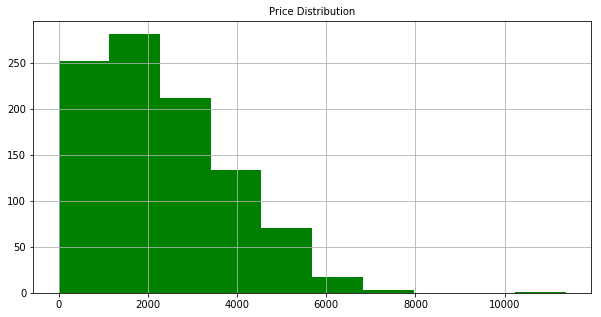

In [62]:
df_sample.price.hist(color='green')
plt.title("Price Distribution")
plt.show()

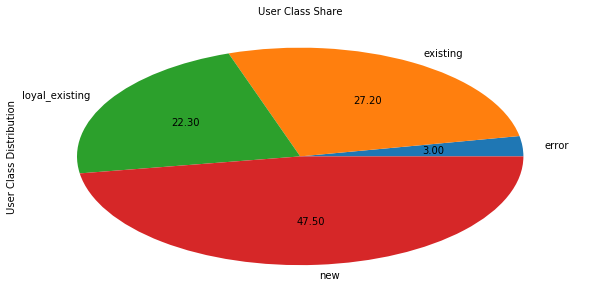

In [63]:
class_series = df_sample.groupby('user_class').size()
class_series.name = 'User Class Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('User Class Share')
plt.show()

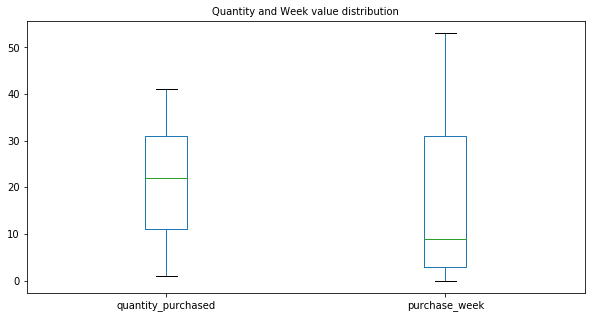

In [64]:
df_sample[['quantity_purchased','purchase_week']].plot.box()
plt.title('Quantity and Week value distribution')
plt.show()

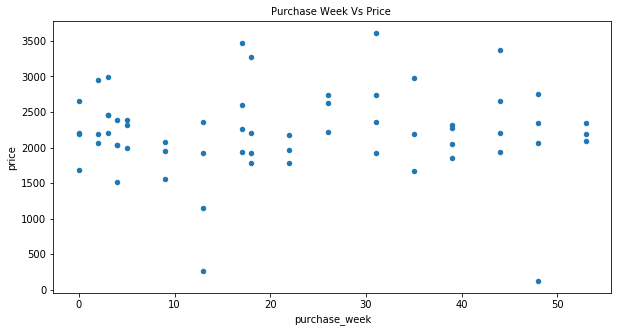

In [65]:
# bubble
uclass_map = {'new': 1, 'existing': 2, 'loyal_existing': 3,'error':0}
df_sample['enc_uclass'] = df_sample.user_class.map(uclass_map) 
bubble_df = df_sample[['enc_uclass',
                'purchase_week',
                'price','product_id']].groupby(['purchase_week',
                                                'enc_uclass']).agg({'price':'mean',
                                                                    'product_id':'count'}).reset_index()
bubble_df.rename(columns={'product_id':'total_transactions'},inplace=True)


bubble_df.plot.scatter(x='purchase_week',
                       y='price')
plt.title('Purchase Week Vs Price ')
plt.show()

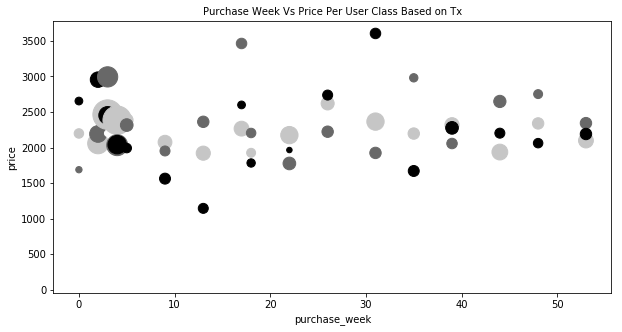

In [66]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass'],
                       s=bubble_df['total_transactions']*10)
plt.title('Purchase Week Vs Price Per User Class Based on Tx')                          
plt.show()